#### Import required libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Compiler flags


#### Before trying to increase the execution speed via parallelisastion, I experimented with compiler flags optimastions on BC4, follwing [Intel's guide for the icc compiler](https://www.intel.com/content/www/us/en/content-details/671224/quick-reference-guide-to-optimization-with-intel-c-and-fortran-compilers.html). The full list of flags can be found in the appendix of my report.

Basic: icc -o output.o input.c \\$(gsl-config --cflags) \$(gsl-config --libs) -fopenmp -lm

Optimisedv1: icc -xhost -o output.o input.c \\$(gsl-config --cflags) \$(gsl-config --libs) -fopenmp -O1 -lm

Optimisedv2: icc -xhost -o output.o input.c \\$(gsl-config --cflags) \$(gsl-config --libs) -fopenmp -O2 -lm

Optimisedv3: icc -xhost -o output.o input.c \\$(gsl-config --cflags) \$(gsl-config --libs) -fopenmp -O3 -lm

Optimisedv4: icc -o output.o input.c \\$(gsl-config --cflags) \$(gsl-config --libs) -fopenmp -O2 -lm

Optimisedv5: icc -xhost -o output.o input.c \\$(gsl-config --cflags) \$(gsl-config --libs) -fopenmp -lm

Optimisedv6: icc -xhost -ipo -o output.o input.c \\$(gsl-config --cflags) \$(gsl-config --libs) -fopenmp -O2 -lm

Note: Some extra arguments such as -std=c99 may be required depndeing on the modules loaded when compiling

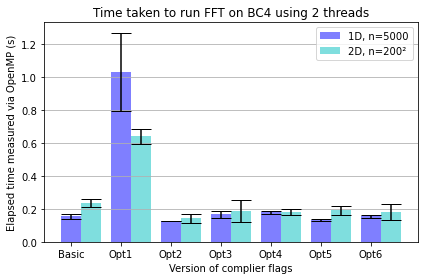

In [2]:
# Input data 
# This data was manually colleted on BC4, for each set of compiler flags 3 repeats were taken
# Timing was carried out by OpenMP, omp_get_wtime()

compiler_times_1d=np.zeros((7,3))
compiler_times_1d[0]=[0.15618, 0.168867, 0.137644] 
compiler_times_1d[1]=[0.873207, 0.850884, 1.368021]
compiler_times_1d[2]=[0.128538, 0.127347, 0.128090]
compiler_times_1d[3]=[0.136626, 0.178519, 0.187297]
compiler_times_1d[4]=[0.176507, 0.171416, 0.193335]
compiler_times_1d[5]=[0.137120, 0.136904, 0.123146]
compiler_times_1d[6]=[0.161470, 0.162414, 0.141055]

compiler_times_2d=np.zeros((7,3))
compiler_times_2d[0]=[0.211414, 0.230913, 0.267703] 
compiler_times_2d[1]=[0.702743, 0.592067, 0.629674]
compiler_times_2d[2]=[0.135264, 0.115914, 0.179585]
compiler_times_2d[3]=[0.280160, 0.167763, 0.115935]
compiler_times_2d[4]=[0.198229, 0.159028, 0.186825]
compiler_times_2d[5]=[0.227175, 0.183727, 0.164867]
compiler_times_2d[6]=[0.136045, 0.248446, 0.164535]

compiler_times_1d_stats=np.zeros((7,2))
compiler_times_2d_stats=np.zeros((7,2))
# [0] is for means
# [1] is for std (error)

for i in range(7):
    compiler_times_1d_stats[i][0] = np.mean(compiler_times_1d[i])
    compiler_times_1d_stats[i][1] = np.std(compiler_times_1d[i])
    compiler_times_2d_stats[i][0] = np.mean(compiler_times_2d[i])
    compiler_times_2d_stats[i][1] = np.std(compiler_times_2d[i])

# Create lists for the plot
versions = ['Basic', 'Opt1', 'Opt2', 'Opt3', 'Opt4', 'Opt5', 'Opt6']
x_pos = np.arange(len(versions))
means1d = [compiler_times_1d_stats[i][0] for i in range(7)]
errors1d = [compiler_times_1d_stats[i][1] for i in range(7)]
means2d = [compiler_times_2d_stats[i][0] for i in range(7)]
errors2d = [compiler_times_2d_stats[i][1] for i in range(7)]
fig, ax = plt.subplots()

ax.bar(x_pos, means1d, yerr=errors1d, align='center', alpha=0.5, color='b', ecolor='black', capsize=10, label='1D, n=5000', width=0.4)
ax.bar(x_pos+0.4, means2d, yerr=errors2d, align='center', alpha=0.5,color='c', ecolor='black', capsize=10, label='2D, n=200\u00b2', width=0.4)
#plt.axhline(y=min(means1d), alpha=0.5, color='b', linestyle='-.', linewidth=1, label="1D minimum")
#plt.axhline(y=min(means2d), alpha=0.5, color='c', linestyle='-.', linewidth=1, label="2D minimum")
ax.set_ylabel('Elapsed time measured via OpenMP (s)')
ax.set_xlabel('Version of complier flags')
ax.set_xticks(x_pos)
ax.set_xticklabels(versions)
ax.set_title('Time taken to run FFT on BC4 using 2 threads')
ax.yaxis.grid(True)

# Save the figure and show
plt.legend()
plt.tight_layout()
# plt.savefig('compiler_times_all.png', bbox_inches='tight')
plt.show()

#### Since the Opt1 times are so long I'm going to re-plot without them to help the scale

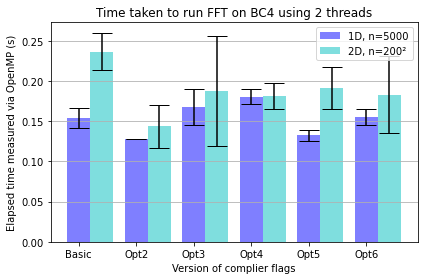

In [3]:
# Input data 
# This data was manually colleted on BC4, for each set of compiler flags 3 repeats were taken
# Timing was carried out by OpenMP, omp_get_wtime()

compiler_times_1d=np.zeros((6,3))
compiler_times_1d[0]=[0.15618, 0.168867, 0.137644] 
compiler_times_1d[1]=[0.128538, 0.127347, 0.128090]
compiler_times_1d[2]=[0.136626, 0.178519, 0.187297]
compiler_times_1d[3]=[0.176507, 0.171416, 0.193335]
compiler_times_1d[4]=[0.137120, 0.136904, 0.123146]
compiler_times_1d[5]=[0.161470, 0.162414, 0.141055]

compiler_times_2d=np.zeros((6,3))
compiler_times_2d[0]=[0.211414, 0.230913, 0.267703] 
compiler_times_2d[1]=[0.135264, 0.115914, 0.179585]
compiler_times_2d[2]=[0.280160, 0.167763, 0.115935]
compiler_times_2d[3]=[0.198229, 0.159028, 0.186825]
compiler_times_2d[4]=[0.227175, 0.183727, 0.164867]
compiler_times_2d[5]=[0.136045, 0.248446, 0.164535]

compiler_times_1d_stats=np.zeros((6,2))
compiler_times_2d_stats=np.zeros((6,2))
# [0] is for means
# [1] is for std (error)

for i in range(6):
    compiler_times_1d_stats[i][0] = np.mean(compiler_times_1d[i])
    compiler_times_1d_stats[i][1] = np.std(compiler_times_1d[i])
    compiler_times_2d_stats[i][0] = np.mean(compiler_times_2d[i])
    compiler_times_2d_stats[i][1] = np.std(compiler_times_2d[i])

# Create lists for the plot
versions = ['Basic', 'Opt2', 'Opt3', 'Opt4', 'Opt5', 'Opt6']
x_pos = np.arange(len(versions))
means1d = [compiler_times_1d_stats[i][0] for i in range(6)]
errors1d = [compiler_times_1d_stats[i][1] for i in range(6)]
means2d = [compiler_times_2d_stats[i][0] for i in range(6)]
errors2d = [compiler_times_2d_stats[i][1] for i in range(6)]
fig, ax = plt.subplots()

ax.bar(x_pos, means1d, yerr=errors1d, align='center', alpha=0.5, color='b', ecolor='black', capsize=10, label='1D, n=5000', width=0.4)
ax.bar(x_pos+0.4, means2d, yerr=errors2d, align='center', alpha=0.5,color='c', ecolor='black', capsize=10, label='2D, n=200\u00b2', width=0.4)
#plt.axhline(y=min(means1d), alpha=0.5, color='b', linestyle='-.', linewidth=1, label="1D minimum")
#plt.axhline(y=min(means2d), alpha=0.5, color='c', linestyle='-.', linewidth=1, label="2D minimum")
ax.set_ylabel('Elapsed time measured via OpenMP (s)')
ax.set_xlabel('Version of complier flags')
ax.set_xticks(x_pos)
ax.set_xticklabels(versions)
ax.set_title('Time taken to run FFT on BC4 using 2 threads')
ax.yaxis.grid(True)

# Save the figure and show
plt.legend()
plt.tight_layout()
# plt.savefig('compiler_times_wo1.png', bbox_inches='tight')
plt.show()

## Accuracy tests

#### When running the MPI version, only certain problem sizes get the correct results, below is some code to analyse this relationship


Number of processes: 1


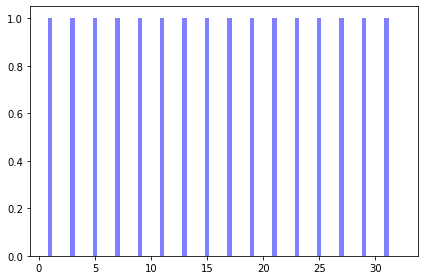

Size must be a multiple of: 2



Number of processes: 2


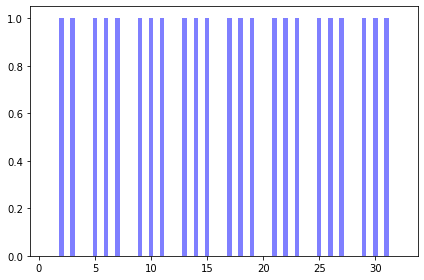

Size must be a multiple of: 4



Number of processes: 3


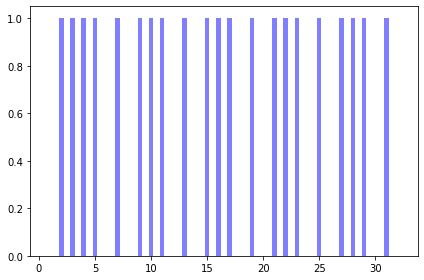




Number of processes: 4


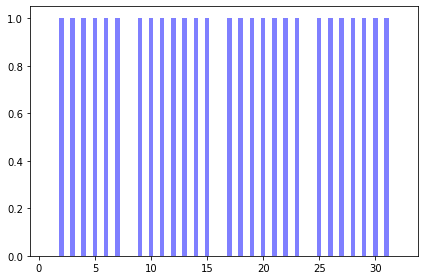

Size must be a multiple of: 8





In [4]:
for num_proc in range(1,5):    
    # Open file
    file_name = "results/accuracy/mpi_accuracy_"+str(num_proc)+".txt"
    my_file = open(file_name, "r")
    data = my_file.read()
    
    # Put data into list
    data_into_list = data.split("\n")
    
    # Close file
    my_file.close()
    
    # Remove empty lines
    del data_into_list[0::3]
    #print(data_into_list)
    
    sizes = []
    errors = []
    
    # Put problem size and errors into lists
    for i in range(0,len(data_into_list),2):
        sizes.append(int(data_into_list[i][6:9].replace(',','')))
        errors.append(float(data_into_list[i+1][6:]))
    
    # If there is an error, set to 1
    for i in range(len(errors)):
        if errors[i]>0:
            errors[i]=1
        elif str(errors[i]) == '-nan':
            errors[i]=1
        elif str(errors[i]) == 'nan':
            errors[i]=1
    fig, ax = plt.subplots()
    ax.bar(sizes[0:32], errors[0:32], align='center', alpha=0.5, color='b', ecolor='black', capsize=10, width=0.4)

    # Save the figure and show
    plt.tight_layout()
    #plt.savefig('compiler_times_all.png', bbox_inches='tight')
    print("Number of processes: " + str(num_proc))
    plt.show()
    
    non_error_sizes = []
    
    for i in range(len(errors)):
        if errors[i] == 0:
            non_error_sizes.append(sizes[i])
     
    # Here lists are created, with each value incresaing by a step size, 
    # This step size also increases with every list
    # It is then checked wheter the values contained in that list are also in the list of valid (zero error) problem sizes
    # This way the relationship between the number of MPI processes and valid problem size can be investigated
    
    for i in range(1,len(non_error_sizes)):
        test_list=[]
        test_list.append(0)
        for j in range(1,len(non_error_sizes)+i):
            test_list.append(test_list[j-1]+i)
            
        test_list.append(1)
        if all([item in test_list for item in non_error_sizes]):
            print("Size must be a multiple of: "+str(i))
            break

    print("\n\n")

#### There is no error when (problem size) mod (2 x Number of processes) = 0

This is due to splitting the sub arrays into equal parts between processes, and only allowing even input values. For use within a library, this issue could be solved by zero padding the input to a valid input size. I have modified my code to just round up the input size to the next valid size, from a quick inspection this is almost always <1%

## Speed / Execution Time

### Time vs Size

#### Investigating speed as a function of problem size for every approach

Data is from my laptop: Intel i7-7700HQ CPU @ 2.80GHz, 4 Core(s), 8 Logical Processor(s)


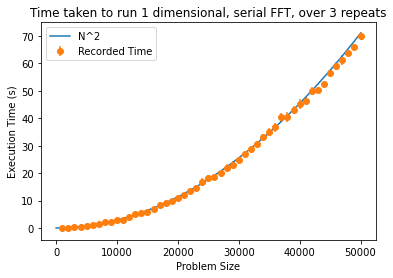

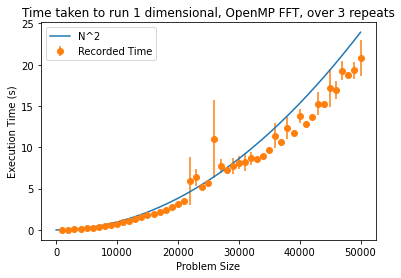

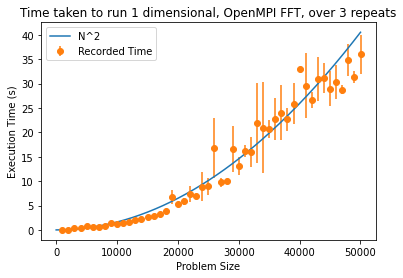

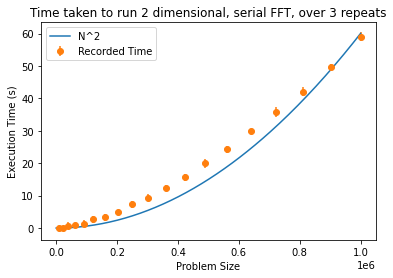

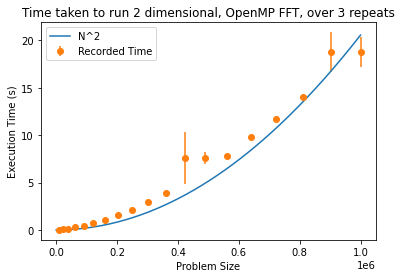

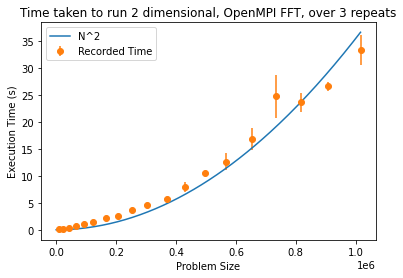

In [5]:
methods = ['serial', 'omp', 'mpi']
for dimension in [1,2]:
    for method in methods:    
        # Open file
        file_name = "results/speed_vs_size/"+str(method)+"_"+str(dimension)+"d.txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")
        #print(data_into_list)

        # Close file
        my_file.close()

        sizes = []
        means = []
        errors = []

        for run in range(0,len(data_into_list),6):
            times = []
            if dimension == 1:
                sizes.append(int(data_into_list[run].partition('Size: ')[2].partition(",")[0]))
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                
            elif dimension == 2:
                sizes.append((int(data_into_list[run].partition('Size: ')[2].partition(",")[0])**2))
                if method == "serial":
                    times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                
                elif method == "omp":
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))
                
                elif method == 'mpi':
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))
            
            means.append(np.mean(times))
            if method == 'serial':
                errors.append(np.std(times)+0.577) # Due to measurement uncertainty in unix seconds from <time.h>
            else:
                errors.append(np.std(times))

        x = np.linspace(1,max(sizes),200)
        y2 = (max(times)/(max(sizes)**2))*(x**2)

        plt.plot(x,y2, label='N^2')
        plt.errorbar(sizes, means, yerr=errors, fmt='o', label='Recorded Time')
        #plt.savefig('compiler_times_all.png', bbox_inches='tight')
        plt.ylabel('Execution Time (s)')    
        
        title_text=['serial', 'OpenMP', 'OpenMPI']
        
        if dimension == 1:
            plt.xlabel('Problem Size')
            plt.title('Time taken to run '+str(dimension)+' dimensional, '+title_text[methods.index(method)]+' FFT, over 3 repeats')
        elif dimension == 2:
            plt.xlabel('Problem Size')
            plt.title('Time taken to run '+str(dimension)+' dimensional, '+title_text[methods.index(method)]+' FFT, over 3 repeats')
        plt.legend()
        plt.show()


#### Time vs. Size (as above) but now combining plots

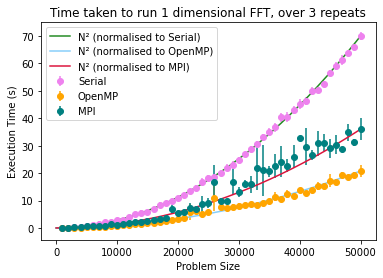

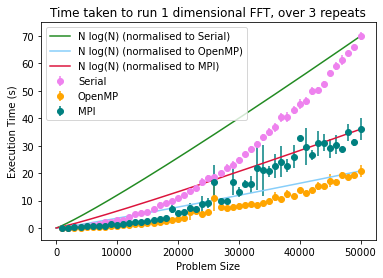

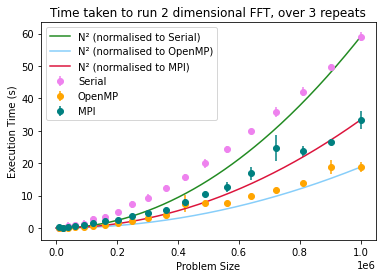

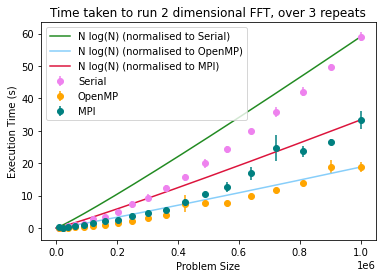

<Figure size 432x288 with 0 Axes>

In [6]:
methods = ['serial', 'omp', 'mpi']
title_text=['Serial', 'OpenMP', 'MPI']
for dimension in [1,2]:
    info = [[],[],[]]
    sizes = [[],[],[]]
    means = [[],[],[]]
    errors = [[],[],[]]
    for method in methods:    
        # Open file
        file_name = "results/speed_vs_size/"+str(method)+"_"+str(dimension)+"d.txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")
        #print(data_into_list)

        # Close file
        my_file.close()

        current_index = methods.index(method)
        
        for run in range(0,len(data_into_list),6):
            times = []
            if dimension == 1:
                sizes[current_index].append(int(data_into_list[run].partition('Size: ')[2].partition(",")[0]))
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                
            elif dimension == 2:
                sizes[current_index].append((int(data_into_list[run].partition('Size: ')[2].partition(",")[0])**2))
                if method == "serial":
                    times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                
                elif method == "omp":
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))
                
                elif method == 'mpi':
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))
            
            means[current_index].append(np.mean(times))
            
            info[current_index].append(title_text[methods.index(method)])
            
            if method == 'serial':
                errors[current_index].append(np.std(times)+0.577) # Due to measurement uncertainty in unix seconds from <time.h>
            else:
                errors[current_index].append(np.std(times))

    x = np.linspace(1,max(sizes[0]),200)
    y = x**2
    y0 = (max(means[0])/(max(sizes[0])**2))*(x**2)
    y1 = (max(means[1])/(max(sizes[0])**2))*(x**2)
    y2 = (max(means[2])/(max(sizes[0])**2))*(x**2)
    # y1 = (max(means[0])/(max(sizes[0])*np.log(max(sizes[0])))) * (x**2)
    ya = (max(means[0])/(max(sizes[0])*np.log(max(sizes[0]))))*(x*np.log(x))
    yb = (max(means[1])/(max(sizes[0])*np.log(max(sizes[0]))))*(x*np.log(x))
    yc = (max(means[2])/(max(sizes[0])*np.log(max(sizes[0]))))*(x*np.log(x))
    # ya = (max(means[1])/(max(sizes[0])**2))*(x*np.log(x))
    

    #plt.plot(x,y, label='N^2')
    plt.plot(x,y0, label='N\u00b2 (normalised to Serial)', color='forestgreen')
    plt.plot(x,y1, label='N\u00b2 (normalised to OpenMP)',color='lightskyblue')
    plt.plot(x,y2, label='N\u00b2 (normalised to MPI)',color='crimson')

    
    plt.errorbar(sizes[0], means[0], yerr=errors[0], fmt='o', color='violet', label=str(info[0][0]))
    plt.errorbar(sizes[0], means[1], yerr=errors[1], fmt='o', color='orange', label=str(info[1][0]))
    plt.errorbar(sizes[0], means[2], yerr=errors[2], fmt='o',color='teal', label=str(info[2][0]))
    #plt.savefig('compiler_times_all.png', bbox_inches='tight')
    plt.ylabel('Execution Time (s)')    

    if dimension == 1:
        plt.xlabel('Problem Size')
        plt.title('Time taken to run '+str(dimension)+' dimensional FFT, over 3 repeats')
    elif dimension == 2:
        plt.xlabel('Problem Size')
        plt.title('Time taken to run '+str(dimension)+' dimensional FFT, over 3 repeats')
    plt.legend()
    plt.show()
    plt.clf()
    
    # y1 = (max(means[0])/(max(sizes[0])*np.log(max(sizes[0])))) * (x**2)
    ya = (max(means[0])/(max(sizes[0])*np.log(max(sizes[0]))))*(x*np.log(x))
    yb = (max(means[1])/(max(sizes[0])*np.log(max(sizes[0]))))*(x*np.log(x))
    yc = (max(means[2])/(max(sizes[0])*np.log(max(sizes[0]))))*(x*np.log(x))
    # ya = (max(means[1])/(max(sizes[0])**2))*(x*np.log(x))
    
    #plt.plot(x,y, label='N^2')
    plt.plot(x,ya, label='N log(N) (normalised to Serial)',color='forestgreen')
    plt.plot(x,yb, label='N log(N) (normalised to OpenMP)',color='lightskyblue')
    plt.plot(x,yc, label='N log(N) (normalised to MPI)',color='crimson')
    
    plt.errorbar(sizes[0], means[0], yerr=errors[0], fmt='o', color='violet', label=str(info[0][0]))
    plt.errorbar(sizes[0], means[1], yerr=errors[1], fmt='o', color='orange', label=str(info[1][0]))
    plt.errorbar(sizes[0], means[2], yerr=errors[2], fmt='o',color='teal', label=str(info[2][0]))
    #plt.savefig('compiler_times_all.png', bbox_inches='tight')
    plt.ylabel('Execution Time (s)')    

    if dimension == 1:
        plt.xlabel('Problem Size')
        plt.title('Time taken to run '+str(dimension)+' dimensional FFT, over 3 repeats')
    elif dimension == 2:
        plt.xlabel('Problem Size')
        plt.title('Time taken to run '+str(dimension)+' dimensional FFT, over 3 repeats')
    plt.legend()
    plt.show()
    plt.clf()


### Time vs number of threads/processes

The main area of interest within this project is the increases in execution time when using parallel methods

Here are the timings for OpenMP and MPI approaches

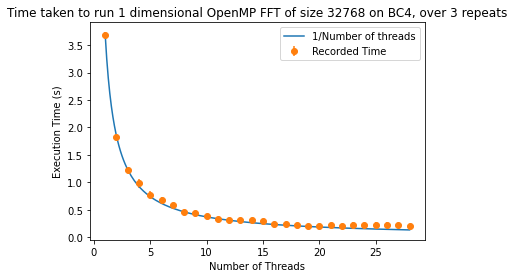

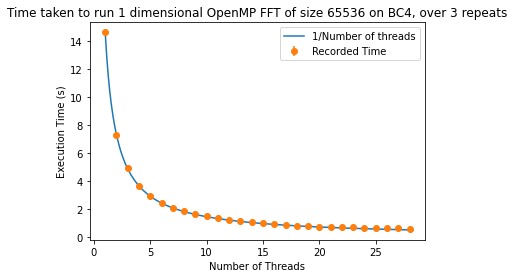

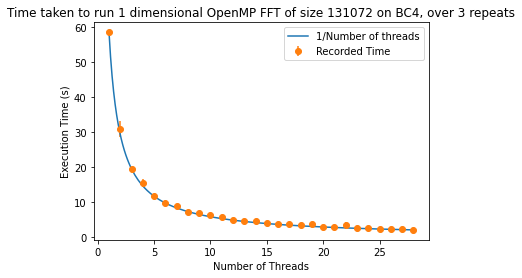

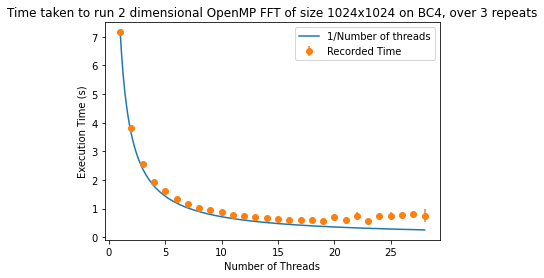

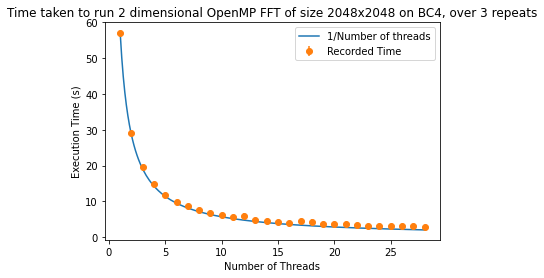

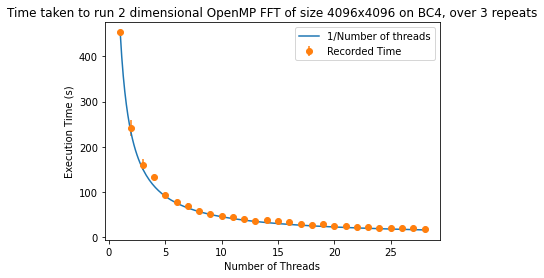

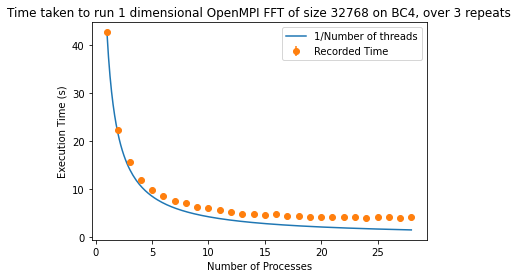

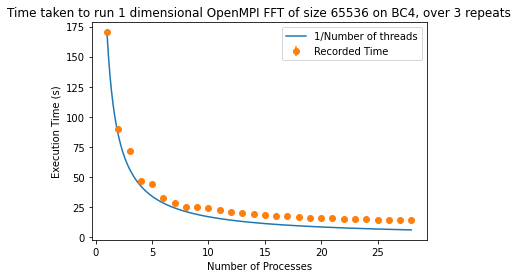

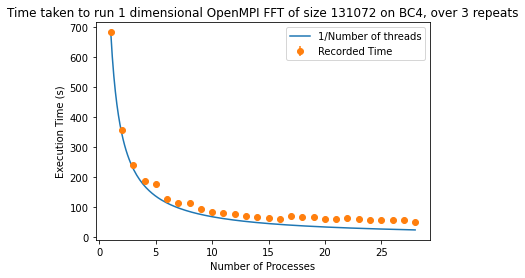

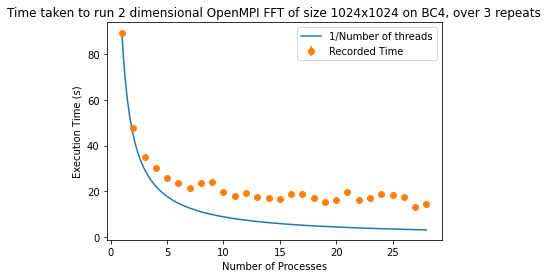

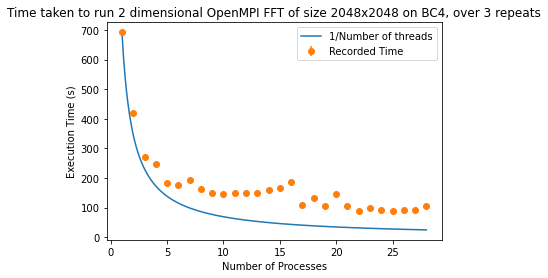

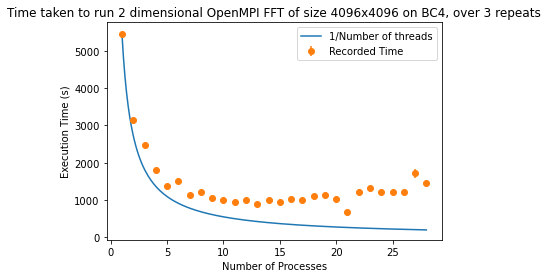

In [7]:
methods=['omp', 'mpi']
for method in methods:
    for job_number in range(1,7):  
        # Open file
        file_name = "results/speed_vs_threads/"+str(method)+"_results_v"+str(job_number)+".txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")

        # Close file
        my_file.close()

        # Remove un needed info
        del data_into_list[0::8]
        del data_into_list[0::7]

        if method == 'mpi':
            size = int(data_into_list[0].partition('Input:')[2].partition(",")[0])
        elif method == 'omp':
            size = int(data_into_list[0].partition('Size: ')[2].partition(",")[0])
            
        dimension = int(data_into_list[0].partition('Dimension: ')[2].partition(",")[0])

        threads = []
        means = []
        errors = []

        # Put number of threads, times and errors into lists
        for run in range(0,len(data_into_list),6):
             # I really should have made sure the outputs were consistent
            times = []
            if dimension == 1:
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                if method == 'mpi':
                    threads.append(int(data_into_list[run].partition('Processes: ')[2].partition(",")[0]))
                elif method == 'omp':
                    threads.append(int(data_into_list[run].partition('Threads: ')[2].partition(",")[0]))

            elif dimension == 2:
                if method == "omp":
                    threads.append((int(data_into_list[run].partition('Threads: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))

                elif method == 'mpi':
                    threads.append((int(data_into_list[run].partition('Processes: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))

            means.append(np.mean(times))
            errors.append(np.std(times))

        # Plot 1/n (normalised to data) to compare
        x = np.linspace(1,28,200)
        if dimension == 1:
            y = (1/x)*means[0]
        elif dimension == 2:
            y = (1/x)*means[0]

        title_text = ['OpenMP', 'OpenMPI']
        plt.plot(x,y, label='1/Number of threads')
        plt.errorbar(threads, means, yerr=errors, fmt='o', label='Recorded Time')
        #save_name = str(method)+'_v_'+str(run_number)+'.png'
        #plt.savefig(save_name, bbox_inches='tight')
        plt.ylabel('Execution Time (s)')
        if method == 'omp':
            plt.xlabel('Number of Threads')
        if method == 'mpi':
            plt.xlabel('Number of Processes')
        if dimension == 1:
            plt.title('Time taken to run '+str(dimension)+' dimensional '+title_text[methods.index(method)]+' FFT of size '+str(size)+' on BC4, over 3 repeats')
        elif dimension == 2:
            plt.title('Time taken to run '+str(dimension)+' dimensional '+title_text[methods.index(method)]+' FFT of size '+str(size)+'x'+str(size)+' on BC4, over 3 repeats')
        plt.legend()
        plt.show()


#### This is same data as above but combining plots

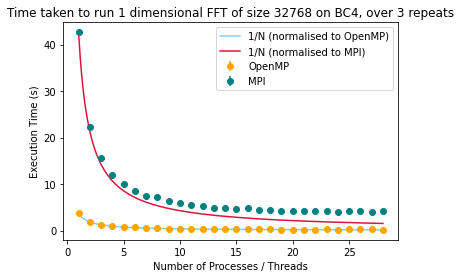

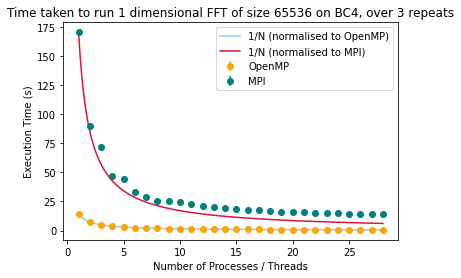

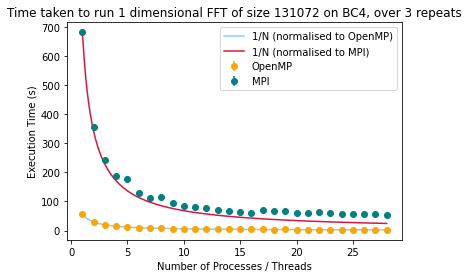

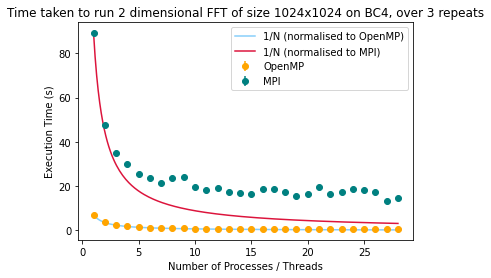

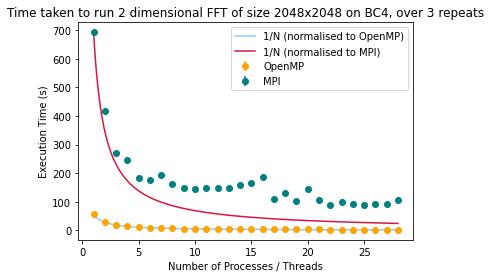

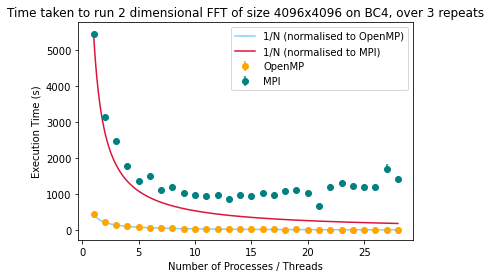

In [8]:
methods=['omp', 'mpi']
title_text = ['OpenMP', 'MPI']
for job_number in range(1,7): 
    info = [[],[]]
    threads = [[],[]]
    means = [[],[]]
    errors = [[],[]]
    for method in methods:
        # Open file
        file_name = "results/speed_vs_threads/"+str(method)+"_results_v"+str(job_number)+".txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")

        # Close file
        my_file.close()
        
        current_index = methods.index(method)
        
        # Remove un needed info
        del data_into_list[0::8]
        del data_into_list[0::7]

        if method == 'mpi':
            size = int(data_into_list[0].partition('Input:')[2].partition(",")[0])
        elif method == 'omp':
            size = int(data_into_list[0].partition('Size: ')[2].partition(",")[0])
            
        dimension = int(data_into_list[0].partition('Dimension: ')[2].partition(",")[0])

        # Put number of threads, times and errors into lists
        for run in range(0,len(data_into_list),6):
            # I really should have made sure the outputs were consistent
            times = []
            if dimension == 1:
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                if method == 'mpi':
                    threads[current_index].append(int(data_into_list[run].partition('Processes: ')[2].partition(",")[0]))
                elif method == 'omp':
                    threads[current_index].append(int(data_into_list[run].partition('Threads: ')[2].partition(",")[0]))

            elif dimension == 2:
                if method == "omp":
                    threads[current_index].append((int(data_into_list[run].partition('Threads: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))

                elif method == 'mpi':
                    threads[current_index].append((int(data_into_list[run].partition('Processes: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))

            means[current_index].append(np.mean(times))
            errors[current_index].append(np.std(times))
            info[current_index].append(title_text[methods.index(method)])

    # Plot 1/n (normalised to data) to compare
    x = np.linspace(1,28,200)
    y0 = (1/x)*means[0][0]
    y1 = (1/x)*means[1][0]

    plt.plot(x,y0, color='lightskyblue', label='1/N (normalised to OpenMP)')
    plt.plot(x,y1, color ='crimson', label='1/N (normalised to MPI)')
    plt.errorbar(threads[0], means[0], yerr=errors[0], fmt='o', color='orange', label=str(info[0][0]))
    plt.errorbar(threads[0], means[1], yerr=errors[1], fmt='o', color='teal', label=str(info[1][0]))
    #save_name = str(method)+'_v_'+str(run_number)+'.png'
    #plt.savefig(save_name, bbox_inches='tight')
    plt.ylabel('Execution Time (s)')
    plt.xlabel('Number of Processes / Threads')
    if dimension == 1:
        plt.title('Time taken to run '+str(dimension)+' dimensional FFT of size '+str(size)+' on BC4, over 3 repeats')
    elif dimension == 2:
        plt.title('Time taken to run '+str(dimension)+' dimensional FFT of size '+str(size)+'x'+str(size)+' on BC4, over 3 repeats')
    plt.legend()
    plt.show()

### Speed Up and Efficiency 

#### Speed Up first:

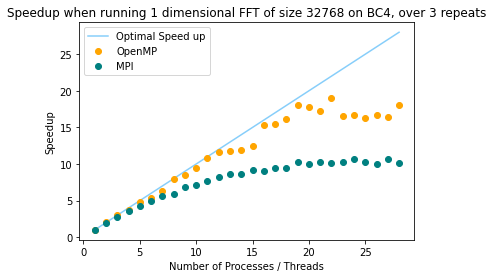

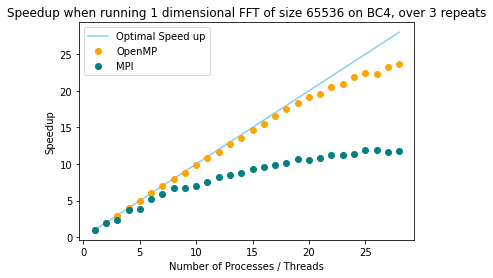

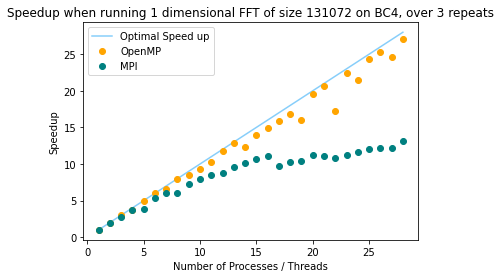

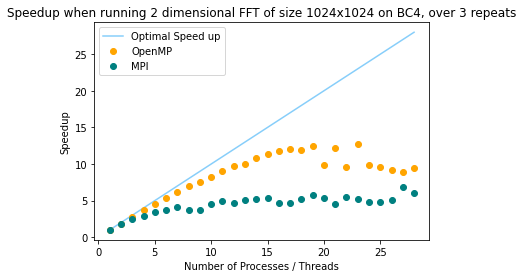

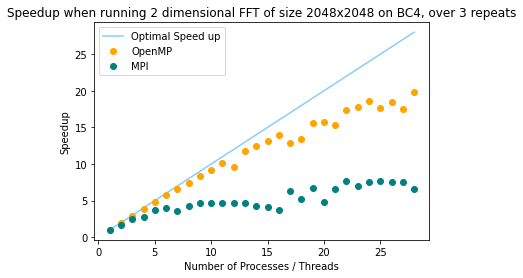

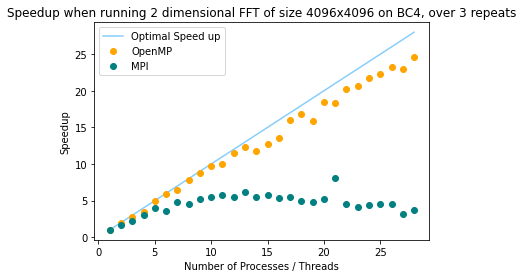

In [9]:
methods=['omp', 'mpi']
title_text = ['OpenMP', 'MPI']
for job_number in range(1,7): 
    info = [[],[]]
    threads = [[],[]]
    means = [[],[]]
    errors = [[],[]]
    for method in methods:
        # Open file
        file_name = "results/speed_vs_threads/"+str(method)+"_results_v"+str(job_number)+".txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")

        # Close file
        my_file.close()
        
        current_index = methods.index(method)
        
        # Remove un needed info
        del data_into_list[0::8]
        del data_into_list[0::7]

        if method == 'mpi':
            size = int(data_into_list[0].partition('Input:')[2].partition(",")[0])
        elif method == 'omp':
            size = int(data_into_list[0].partition('Size: ')[2].partition(",")[0])
            
        dimension = int(data_into_list[0].partition('Dimension: ')[2].partition(",")[0])

        # Put number of threads, times and errors into lists
        for run in range(0,len(data_into_list),6):
            # I really should have made sure the outputs were consistent
            times = []
            if dimension == 1:
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                if method == 'mpi':
                    threads[current_index].append(int(data_into_list[run].partition('Processes: ')[2].partition(",")[0]))
                elif method == 'omp':
                    threads[current_index].append(int(data_into_list[run].partition('Threads: ')[2].partition(",")[0]))

            elif dimension == 2:
                if method == "omp":
                    threads[current_index].append((int(data_into_list[run].partition('Threads: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))

                elif method == 'mpi':
                    threads[current_index].append((int(data_into_list[run].partition('Processes: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))

            means[current_index].append(np.mean(times))
            errors[current_index].append(np.std(times))
            info[current_index].append(title_text[methods.index(method)])

    
    speed_ups=[[],[]]
    
    for i in [0,1]:
        speed_ups[i].append(1)
        for j in range(1,len(means[i])):
            speed_ups[i].append(means[i][0]/means[i][j])

    
#     # Plot 1/n (normalised to data) to compare
    x = np.linspace(1,28,200)
    y0 = x
    plt.plot(x,y0, color='lightskyblue', label='Optimal Speed up')
    plt.errorbar(threads[0], speed_ups[0], fmt='o', color='orange', label=str(info[0][0]))
    plt.errorbar(threads[0], speed_ups[1], fmt='o', color='teal', label=str(info[1][0]))
    #save_name = str(method)+'_v_'+str(run_number)+'.png'
    #plt.savefig(save_name, bbox_inches='tight')
    plt.ylabel('Speedup')
    plt.xlabel('Number of Processes / Threads')
    if dimension == 1:
        plt.title('Speedup when running '+str(dimension)+' dimensional FFT of size '+str(size)+' on BC4, over 3 repeats')
    elif dimension == 2:
        plt.title('Speedup when running '+str(dimension)+' dimensional FFT of size '+str(size)+'x'+str(size)+' on BC4, over 3 repeats')
    plt.legend()
    plt.show()

#### Going to further combine these plots as the axis scales are the same

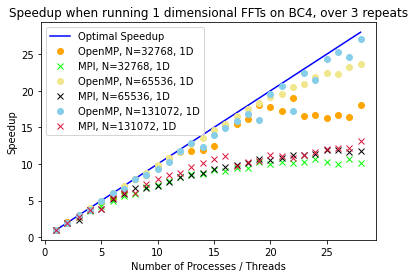

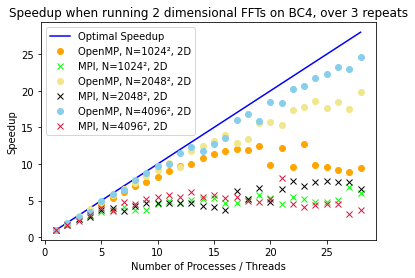

In [10]:
methods=['omp', 'mpi']
title_text = ['OpenMP', 'MPI']
speed_ups_master = []
master_info = []
master_threads = list(range(1,29))
for job_number in range(1,7): 
    info = [[],[]]
    threads = [[],[]]
    means = [[],[]]
    errors = [[],[]]
    for method in methods:
        # Open file
        file_name = "results/speed_vs_threads/"+str(method)+"_results_v"+str(job_number)+".txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")

        # Close file
        my_file.close()
        
        current_index = methods.index(method)
        
        # Remove un needed info
        del data_into_list[0::8]
        del data_into_list[0::7]

        if method == 'mpi':
            size = int(data_into_list[0].partition('Input:')[2].partition(",")[0])
        elif method == 'omp':
            size = int(data_into_list[0].partition('Size: ')[2].partition(",")[0])
            
        dimension = int(data_into_list[0].partition('Dimension: ')[2].partition(",")[0])

        # Put number of threads, times and errors into lists
        for run in range(0,len(data_into_list),6):
            # I really should have made sure the outputs were consistent
            times = []
            if dimension == 1:
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                if method == 'mpi':
                    threads[current_index].append(int(data_into_list[run].partition('Processes: ')[2].partition(",")[0]))
                elif method == 'omp':
                    threads[current_index].append(int(data_into_list[run].partition('Threads: ')[2].partition(",")[0]))

            elif dimension == 2:
                if method == "omp":
                    threads[current_index].append((int(data_into_list[run].partition('Threads: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))

                elif method == 'mpi':
                    threads[current_index].append((int(data_into_list[run].partition('Processes: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))

            means[current_index].append(np.mean(times))
            errors[current_index].append(np.std(times))
            info[current_index].append(title_text[methods.index(method)])
            info[current_index].append(size)
            info[current_index].append(dimension)
            
    master_info.append(info)
    
    speed_ups=[[],[]]
    
    for i in [0,1]:
        speed_ups[i].append(1)
        for j in range(1,len(means[i])):
            speed_ups[i].append(means[i][0]/means[i][j])

    speed_ups_master.append(speed_ups)

# Plot ideal linear speedup 
x = np.linspace(1,28,200)
y0 = x

# Plot 1D
plt.plot(x,y0, color='b', label='Optimal Speedup')
plt.errorbar(master_threads, speed_ups_master[0][0], fmt='o', color='orange', label=str(master_info[0][0][0])+", N="+str(master_info[0][0][1])+", "+str(master_info[0][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[0][1], fmt='x', color='lime', label=str(master_info[0][1][0])+", N="+str(master_info[0][1][1])+", "+str(master_info[0][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[1][0], fmt='o', color='khaki', label=str(master_info[1][0][0])+", N="+str(master_info[1][0][1])+", "+str(master_info[1][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[1][1], fmt='x', color='black', label=str(master_info[1][1][0])+", N="+str(master_info[1][1][1])+", "+str(master_info[1][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[2][0], fmt='o', color='skyblue', label=str(master_info[2][0][0])+", N="+str(master_info[2][0][1])+", "+str(master_info[2][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[2][1], fmt='x', color='crimson', label=str(master_info[2][1][0])+", N="+str(master_info[2][1][1])+", "+str(master_info[2][1][2])+"D")
# save_name = str(method)+'_v_'+str(run_number)+'.png'
# plt.savefig(save_name, bbox_inches='tight')
plt.ylabel('Speedup')
plt.xlabel('Number of Processes / Threads')
plt.title('Speedup when running 1 dimensional FFTs on BC4, over 3 repeats')
plt.legend()
plt.show()
plt.clf()

# Plot 2d
plt.plot(x,y0, color='b', label='Optimal Speedup')
plt.errorbar(master_threads, speed_ups_master[3][0], fmt='o', color='orange', label=str(master_info[3][0][0])+", N="+str(master_info[3][0][1])+"\u00b2, "+str(master_info[3][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[3][1], fmt='x', color='lime', label=str(master_info[3][1][0])+", N="+str(master_info[3][1][1])+"\u00b2, "+str(master_info[3][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[4][0], fmt='o', color='khaki', label=str(master_info[4][0][0])+", N="+str(master_info[4][0][1])+"\u00b2, "+str(master_info[4][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[4][1], fmt='x', color='black', label=str(master_info[4][1][0])+", N="+str(master_info[4][1][1])+"\u00b2, "+str(master_info[4][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[5][0], fmt='o', color='skyblue', label=str(master_info[5][0][0])+", N="+str(master_info[5][0][1])+"\u00b2, "+str(master_info[5][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[5][1], fmt='x', color='crimson', label=str(master_info[5][1][0])+", N="+str(master_info[5][1][1])+"\u00b2, "+str(master_info[5][1][2])+"D")
# save_name = str(method)+'_v_'+str(run_number)+'.png'
# plt.savefig(save_name, bbox_inches='tight')
plt.ylabel('Speedup')
plt.xlabel('Number of Processes / Threads')
plt.title('Speedup when running 2 dimensional FFTs on BC4, over 3 repeats')
plt.legend()
plt.show()

#### Now looking at efficiency, which is just speedup divided by the number of processors

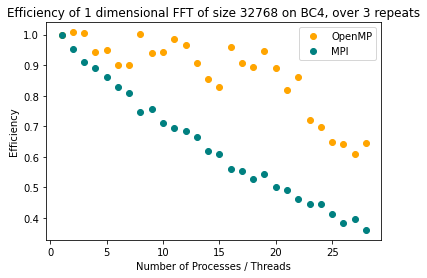

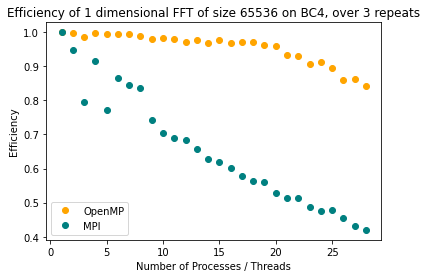

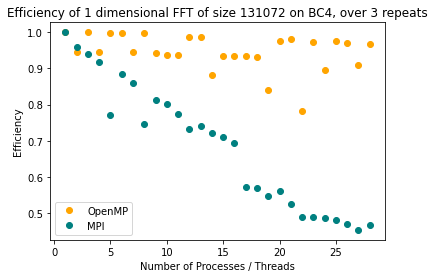

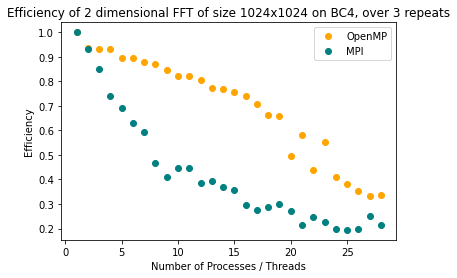

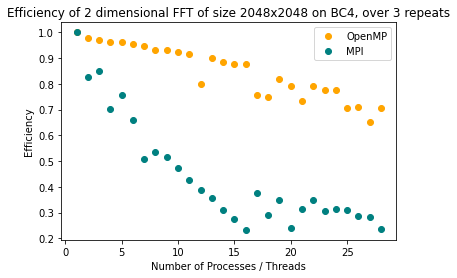

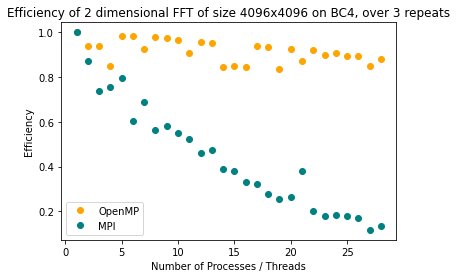

In [11]:
methods=['omp', 'mpi']
title_text = ['OpenMP', 'MPI']
for job_number in range(1,7): 
    info = [[],[]]
    threads = [[],[]]
    means = [[],[]]
    errors = [[],[]]
    for method in methods:
        # Open file
        file_name = "results/speed_vs_threads/"+str(method)+"_results_v"+str(job_number)+".txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")

        # Close file
        my_file.close()
        
        current_index = methods.index(method)
        
        # Remove un needed info
        del data_into_list[0::8]
        del data_into_list[0::7]

        if method == 'mpi':
            size = int(data_into_list[0].partition('Input:')[2].partition(",")[0])
        elif method == 'omp':
            size = int(data_into_list[0].partition('Size: ')[2].partition(",")[0])
            
        dimension = int(data_into_list[0].partition('Dimension: ')[2].partition(",")[0])

        # Put number of threads, times and errors into lists
        for run in range(0,len(data_into_list),6):
            # I really should have made sure the outputs were consistent
            times = []
            if dimension == 1:
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                if method == 'mpi':
                    threads[current_index].append(int(data_into_list[run].partition('Processes: ')[2].partition(",")[0]))
                elif method == 'omp':
                    threads[current_index].append(int(data_into_list[run].partition('Threads: ')[2].partition(",")[0]))

            elif dimension == 2:
                if method == "omp":
                    threads[current_index].append((int(data_into_list[run].partition('Threads: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))

                elif method == 'mpi':
                    threads[current_index].append((int(data_into_list[run].partition('Processes: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))

            means[current_index].append(np.mean(times))
            errors[current_index].append(np.std(times))
            info[current_index].append(title_text[methods.index(method)])

    
    efficiencys=[[],[]]
    
    for i in [0,1]:
        efficiencys[i].append(1)
        for j in range(1,len(means[i])):
            speed_up = (means[i][0]/means[i][j])
            efficiency = (speed_up/threads[i][j])
            efficiencys[i].append(efficiency)

    
#     # Plot 1/n (normalised to data) to compare
    x = np.linspace(1,28,200)
    y = 1-(1/28)*x
    #plt.plot(x,y, color='lightskyblue', label='Optimal Efficeiency')
    plt.errorbar(threads[0], efficiencys[0], fmt='o', color='orange', label=str(info[0][0]))
    plt.errorbar(threads[0], efficiencys[1], fmt='o', color='teal', label=str(info[1][0]))
    #save_name = str(method)+'_v_'+str(run_number)+'.png'
    #plt.savefig(save_name, bbox_inches='tight')
    plt.ylabel('Efficiency')
    plt.xlabel('Number of Processes / Threads')
    if dimension == 1:
        plt.title('Efficiency of '+str(dimension)+' dimensional FFT of size '+str(size)+' on BC4, over 3 repeats')
    elif dimension == 2:
        plt.title('Efficiency of '+str(dimension)+' dimensional FFT of size '+str(size)+'x'+str(size)+' on BC4, over 3 repeats')
    plt.legend()
    plt.show()

#### Once again going to combine these plots

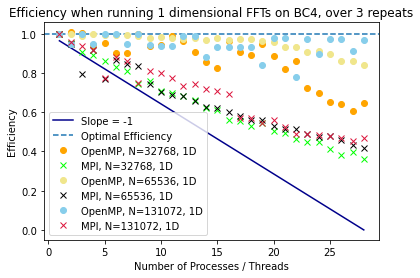

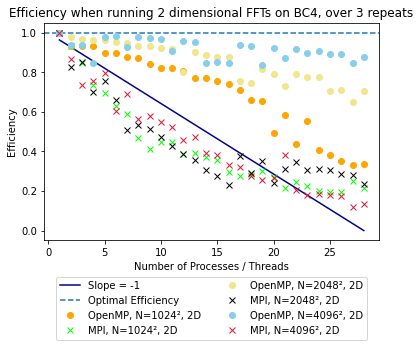

In [12]:
methods=['omp', 'mpi']
title_text = ['OpenMP', 'MPI']
speed_ups_master = []
master_info = []
master_threads = list(range(1,29))
for job_number in range(1,7): 
    info = [[],[]]
    threads = [[],[]]
    means = [[],[]]
    errors = [[],[]]
    for method in methods:
        # Open file
        file_name = "results/speed_vs_threads/"+str(method)+"_results_v"+str(job_number)+".txt"
        my_file = open(file_name, "r")
        data = my_file.read()

        # Put data into list
        data_into_list = data.split("\n")

        # Close file
        my_file.close()
        
        current_index = methods.index(method)
        
        # Remove un needed info
        del data_into_list[0::8]
        del data_into_list[0::7]

        if method == 'mpi':
            size = int(data_into_list[0].partition('Input:')[2].partition(",")[0])
        elif method == 'omp':
            size = int(data_into_list[0].partition('Size: ')[2].partition(",")[0])
            
        dimension = int(data_into_list[0].partition('Dimension: ')[2].partition(",")[0])

        # Put number of threads, times and errors into lists
        for run in range(0,len(data_into_list),6):
            # I really should have made sure the outputs were consistent
            times = []
            if dimension == 1:
                times.append(float(data_into_list[run+1].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+3].partition('Time: ')[2].partition(" ")[0]))
                times.append(float(data_into_list[run+5].partition('Time: ')[2].partition(" ")[0]))
                if method == 'mpi':
                    threads[current_index].append(int(data_into_list[run].partition('Processes: ')[2].partition(",")[0]))
                elif method == 'omp':
                    threads[current_index].append(int(data_into_list[run].partition('Threads: ')[2].partition(",")[0]))

            elif dimension == 2:
                if method == "omp":
                    threads[current_index].append((int(data_into_list[run].partition('Threads: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+3].partition('time: ')[2].partition(" ")[0]))
                    times.append(float(data_into_list[run+5].partition('time: ')[2].partition(" ")[0]))

                elif method == 'mpi':
                    threads[current_index].append((int(data_into_list[run].partition('Processes: ')[2].partition(",")[0])))
                    times.append(float(data_into_list[run+1].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+3].partition('Time: ')[2]))
                    times.append(float(data_into_list[run+5].partition('Time: ')[2]))

            means[current_index].append(np.mean(times))
            errors[current_index].append(np.std(times))
            info[current_index].append(title_text[methods.index(method)])
            info[current_index].append(size)
            info[current_index].append(dimension)
            
    master_info.append(info)
    
    # Being lazy here and not changing variable names from 2 cells above 
    speed_ups=[[],[]]
    
    for i in [0,1]:
        speed_ups[i].append(1)
        for j in range(1,len(means[i])):
            speed_up = (means[i][0]/means[i][j])
            efficiency = (speed_up/threads[i][j])
            speed_ups[i].append(efficiency)

    speed_ups_master.append(speed_ups)

# Plot ideal linear speedup 
x = np.linspace(1,28,200)
y1=1
y = 1-(1/28)*x

# Plot 1D
plt.plot(x,y, color='darkblue', label='Slope = -1')
#plt.plot(x,y1,color='b' , label='Optimal Efficiency')
plt.axhline(y=1, xmin=0, xmax=27, linestyle = 'dashed', label='Optimal Efficiency')
plt.errorbar(master_threads, speed_ups_master[0][0], fmt='o', color='orange', label=str(master_info[0][0][0])+", N="+str(master_info[0][0][1])+", "+str(master_info[0][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[0][1], fmt='x', color='lime', label=str(master_info[0][1][0])+", N="+str(master_info[0][1][1])+", "+str(master_info[0][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[1][0], fmt='o', color='khaki', label=str(master_info[1][0][0])+", N="+str(master_info[1][0][1])+", "+str(master_info[1][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[1][1], fmt='x', color='black', label=str(master_info[1][1][0])+", N="+str(master_info[1][1][1])+", "+str(master_info[1][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[2][0], fmt='o', color='skyblue', label=str(master_info[2][0][0])+", N="+str(master_info[2][0][1])+", "+str(master_info[2][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[2][1], fmt='x', color='crimson', label=str(master_info[2][1][0])+", N="+str(master_info[2][1][1])+", "+str(master_info[2][1][2])+"D")
# save_name = str(method)+'_v_'+str(run_number)+'.png'
# plt.savefig(save_name, bbox_inches='tight')
plt.ylabel('Efficiency')
plt.xlabel('Number of Processes / Threads')
plt.title('Efficiency when running 1 dimensional FFTs on BC4, over 3 repeats')
plt.legend()
plt.show()
plt.clf()

# Plot 2d
plt.plot(x,y, color='darkblue', label='Slope = -1')
plt.axhline(y=1, xmin=0, xmax=27, linestyle = 'dashed', label='Optimal Efficiency')
plt.errorbar(master_threads, speed_ups_master[3][0], fmt='o', color='orange', label=str(master_info[3][0][0])+", N="+str(master_info[3][0][1])+"\u00b2, "+str(master_info[3][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[3][1], fmt='x', color='lime', label=str(master_info[3][1][0])+", N="+str(master_info[3][1][1])+"\u00b2, "+str(master_info[3][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[4][0], fmt='o', color='khaki', label=str(master_info[4][0][0])+", N="+str(master_info[4][0][1])+"\u00b2, "+str(master_info[4][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[4][1], fmt='x', color='black', label=str(master_info[4][1][0])+", N="+str(master_info[4][1][1])+"\u00b2, "+str(master_info[4][1][2])+"D")
plt.errorbar(master_threads, speed_ups_master[5][0], fmt='o', color='skyblue', label=str(master_info[5][0][0])+", N="+str(master_info[5][0][1])+"\u00b2, "+str(master_info[5][0][2])+"D")
plt.errorbar(master_threads, speed_ups_master[5][1], fmt='x', color='crimson', label=str(master_info[5][1][0])+", N="+str(master_info[5][1][1])+"\u00b2, "+str(master_info[5][1][2])+"D")
# save_name = str(method)+'_v_'+str(run_number)+'.png'
# plt.savefig(save_name, bbox_inches='tight')
plt.ylabel('Efficiency')
plt.xlabel('Number of Processes / Threads')
plt.title('Efficiency when running 2 dimensional FFTs on BC4, over 3 repeats')
plt.legend(bbox_to_anchor =(0.5,-0.48), loc='lower center', ncol=2)
plt.show()

### Combined OpenMP and MPI approach 

#### Only had time to get 1D code working in combined implementation, slightly tricky to compare over processes/threads (as only certain combinations of processors and threads work) so just going to compare a few results 

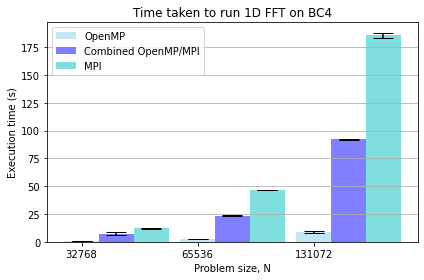

Speed increase of combined approach compared to MPI for size 32768: 1.6079763586197855x
Speed increase of combined approach compared to MPI for size 65536: 1.9815529606582756x
Speed increase of combined approach compared to MPI for size 131072: 2.0142569679175195x


In [13]:
# Using 4 MPI processes and 7 OpenMP threads for 3 different problem sizes
master_sizes = []
combined_times = []
combined_errors =[]

sizes = [2**15,2**16,2**17]
for job_number in range(1,4): 
    # Open file
    file_name = "results/combined/mpi_4_v"+str(job_number)+".txt"
    my_file = open(file_name, "r")
    data = my_file.read()

    # Put data into list
    data_into_list = data.split("\n")

    # Close file
    my_file.close()
    
    # Remove un needed info
#     del data_into_list[0::8]
#     del data_into_list[0::7]
    del data_into_list[0]
    del data_into_list[0]
    del data_into_list[0]
    
    times=[]
    for i in range(0,len(data_into_list),3):
        if i == 0:
            size = int(data_into_list[i].partition('Size: ')[2].partition(',')[0])
            master_sizes.append(size)            
        times.append(float(data_into_list[i+1].partition('Time: ')[2]))
    
    combined_times.append(np.mean(times))
    combined_errors.append(np.std(times))

# print(sizes)
# print(combined_times)
# print(combined_errors)

# Get data from OpenMP and MPI, 7 threads and 4 processes respectively
# Hardcoding as only a few results and don't have time to run any extra analysis, 
# Results here can can be found in results/speed_vs_threads

omp_times = []
omp_errors = []
omp_times_raw = [[0.617208, 0.524429,0.612308],[2.091713,2.091006,2.106312],[8.357834,9.770512,8.359616]]
for i in range(3):
    omp_times.append(np.mean(omp_times_raw[i]))
    omp_errors.append(np.std(omp_times_raw[i]))
# print("")
# print(omp_times)
# print(omp_errors)

mpi_times = []
mpi_errors = []
mpi_times_raw = [[11.913376, 11.976544,12.066250],[46.639472,46.298467,46.334688],[185.420211,183.401074,188.627316]]
for i in range(3):
    mpi_times.append(np.mean(mpi_times_raw[i]))
    mpi_errors.append(np.std(mpi_times_raw[i]))
# print("")
# print(mpi_times)
# print(mpi_errors)

# Create lists for the plot
x_pos = np.arange(len(sizes))
fig, ax = plt.subplots()

ax.bar(x_pos, omp_times, yerr=omp_errors, align='center', alpha=0.5,color='skyblue', ecolor='black', capsize=10, label='OpenMP', width=0.3)
ax.bar(x_pos+0.3, combined_times, yerr=combined_errors, align='center', alpha=0.5, color='b', ecolor='black', capsize=10, label='Combined OpenMP/MPI', width=0.3)
ax.bar(x_pos+0.6, mpi_times, yerr=mpi_errors, align='center', alpha=0.5,color='c', ecolor='black', capsize=10, label='MPI', width=0.3)

#plt.axhline(y=min(means1d), alpha=0.5, color='b', linestyle='-.', linewidth=1, label="1D minimum")
#plt.axhline(y=min(means2d), alpha=0.5, color='c', linestyle='-.', linewidth=1, label="2D minimum")
ax.set_ylabel('Execution time (s)')
ax.set_xlabel('Problem size, N')
ax.set_xticks(x_pos)
ax.set_xticklabels(sizes)
ax.set_title('Time taken to run 1D FFT on BC4')
ax.yaxis.grid(True)


plt.legend()
plt.tight_layout()
plt.show()

for i in range(3):
    print('Speed increase of combined approach compared to MPI for size '+str(sizes[i])+': '+str(mpi_times[i]/combined_times[i])+'x')